In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
df = pd.read_excel('Filmy.xlsx')
df.head(1)

,index,budget,genres,id,keywords,popularity,production_countries,release_date,revenue,title,vote_average,vote_count,cast,director,profit_sum
0,0,237000000,Action Adventure Fantasy Science Fiction,19995.0,culture clash future space war space colony so...,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10 00:00:00,2787965087,Avatar,7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2.550965e+09


In [4]:
#df['budget'] = df['budget'].astype('Int64')
#df['revenue'] = df['revenue'].astype('Int64')
#df['profit_sum'] = df['profit_sum'].astype('Int64')
#df['budget'].unique()
#df['revenue'].unique()

for kolumna in ['budget', 'revenue', 'profit_sum']:
    df[kolumna] = pd.to_numeric(df[kolumna], errors='coerce')
    df[kolumna] = df[kolumna].astype('Int64')

In [5]:
top20_rezyserzy_profit_suma = df. groupby('director')['profit_sum'].sum()
top20_rezyserzy_profit_suma = top20_rezyserzy_profit_suma.sort_values(ascending = False)
top20_rezyserzy_profit_suma = top20_rezyserzy_profit_suma.reset_index()
top20_rezyserzy_profit_suma = top20_rezyserzy_profit_suma.loc[:20,:]
top20_rezyserzy_profit_suma

,director,profit_sum
0,Steven Spielberg,7078535838
1,Peter Jackson,5205642820
2,James Cameron,5136669439
3,Michael Bay,4422524638
4,Christopher Nolan,3222483234
5,Chris Columbus,3098631503
6,George Lucas,2979336893
7,Robert Zemeckis,2600622002
8,Joss Whedon,2424831068
9,Francis Lawrence,2349457182


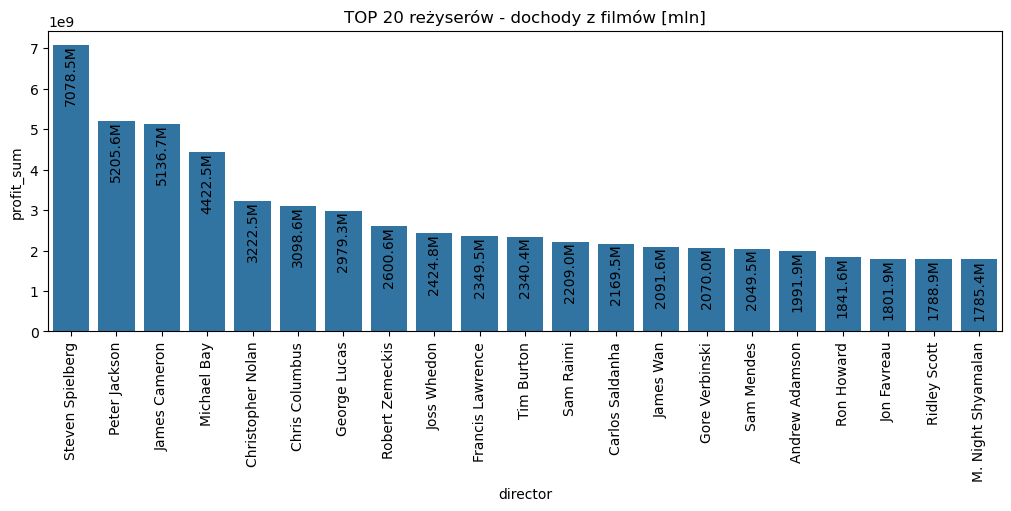

In [6]:
plt.close('all')

plt.figure(layout = 'constrained', figsize=(10, 5))
plt.title('TOP 20 reżyserów - dochody z filmów [mln]')
rys1 = sns.barplot(x = 'director', y = 'profit_sum', data = top20_rezyserzy_profit_suma)

for container in rys1.containers:
    for bar in container:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{bar.get_height()/1e6:.1f}M',
            ha = 'center',
            va = 'top',
            rotation=90
        )
        
plt.xticks(rotation = 90)
plt.savefig('rys1. Top 20 - reżyserzy i dochody z filmów.pdf', format = 'pdf')
rys1.figure


In [7]:
top20_rezyserzy_profit_avg = df. groupby('director')['profit_sum'].mean()
top20_rezyserzy_profit_avg = top20_rezyserzy_profit_avg.sort_values(ascending = False)
top20_rezyserzy_profit_avg = top20_rezyserzy_profit_avg.reset_index()
top20_rezyserzy_profit_avg.rename(columns={'profit_sum' : 'profit_avg'}, inplace = True)
top20_rezyserzy_profit_avg = top20_rezyserzy_profit_avg.loc[:20,:].round(0)
top20_rezyserzy_profit_avg['profit_avg'] = top20_rezyserzy_profit_avg['profit_avg'].astype(int)
top20_rezyserzy_profit_avg

,director,profit_avg
0,Chris Buck,1124219009
1,Kyle Balda,1082730962
2,Lee Unkrich,866969703
3,Joss Whedon,808277023
4,Chris Renaud,800958308
5,Roger Allers,743241776
6,James Cameron,733809920
7,Tim Miller,725112979
8,Pierre Coffin,684637935
9,Pete Docter,621355128


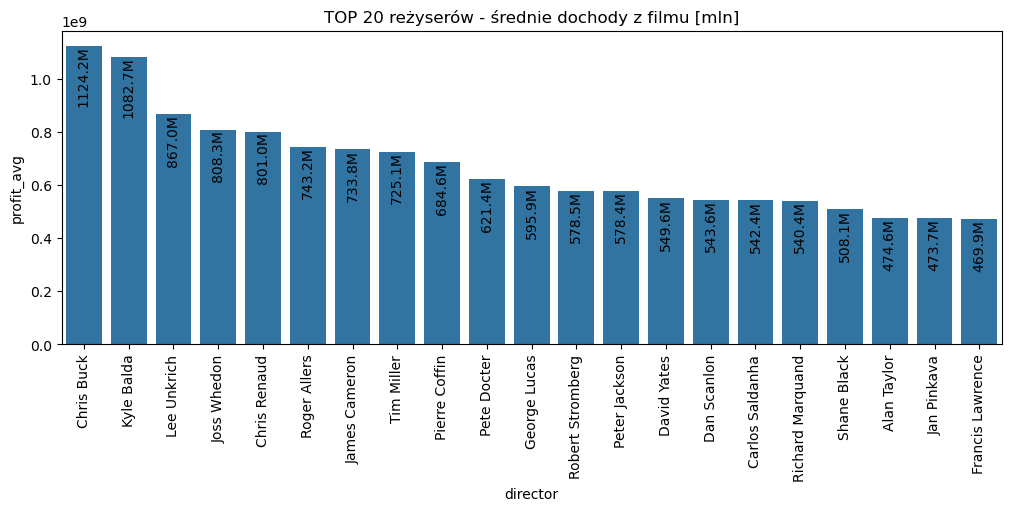

In [8]:
plt.close('all')

plt.figure(layout = 'constrained', figsize=(10, 5))
plt.title('TOP 20 reżyserów - średnie dochody z filmu [mln]')
rys2 = sns.barplot(x = 'director', y = 'profit_avg', data = top20_rezyserzy_profit_avg)
for container in rys2.containers:
    for bar in container:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{bar.get_height()/1e6:.1f}M',
            ha = 'center',
            va = 'top',
            rotation=90
        )

plt.xticks(rotation = 90)
plt.savefig('rys2. TOP20 - reżyserzy i średnie dochody z filmu.pdf', format = 'pdf')
rys2.figure

In [9]:
top20_rezyserzy_profit_suma_avg = (
    df.groupby('director')['profit_sum']
    .agg(profit_suma='sum', profit_avg='mean')
    .sort_values(by='profit_suma', ascending=False)
    .reset_index()
)
top20_rezyserzy_profit_suma_avg = top20_rezyserzy_profit_suma_avg.loc[:20,:].round(0)
top20_rezyserzy_profit_suma_avg['profit_avg'] = top20_rezyserzy_profit_suma_avg['profit_avg'].astype(int)
top20_rezyserzy_profit_suma_avg

,director,profit_suma,profit_avg
0,Steven Spielberg,7078535838,283141434
1,Peter Jackson,5205642820,578404758
2,James Cameron,5136669439,733809920
3,Michael Bay,4422524638,368543720
4,Christopher Nolan,3222483234,402810404
5,Chris Columbus,3098631503,281693773
6,George Lucas,2979336893,595867379
7,Robert Zemeckis,2600622002,200047846
8,Joss Whedon,2424831068,808277023
9,Francis Lawrence,2349457182,469891436


C:\Users\Marek\AppData\Local\Temp\ipykernel_18520\3352444252.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top20_rezyserzy_profit_suma_avg['director'], rotation=90, ha='center')


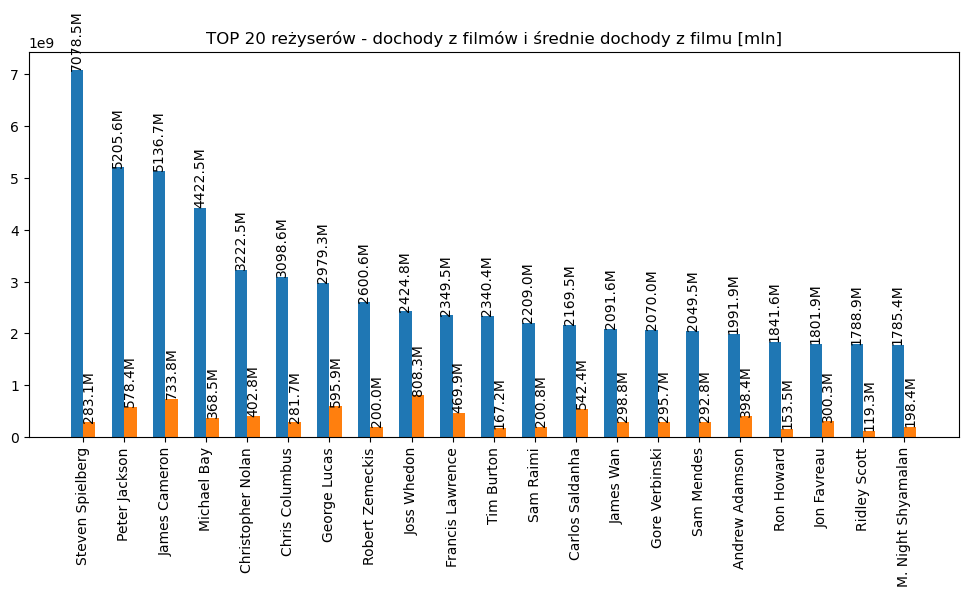

In [10]:
plt.close('all')

x = np.arange(len(top20_rezyserzy_profit_avg))
width = 0.3

(rys3, ax) = plt.subplots(figsize = (12, 5))

ax.set_title('TOP 20 reżyserów - dochody z filmów i średnie dochody z filmu [mln]')
ax.bar(x - width / 2, top20_rezyserzy_profit_suma_avg['profit_suma'], width, label = 'dochod_suma')
ax.bar(x + width / 2, top20_rezyserzy_profit_suma_avg['profit_avg'], width, label = 'dochod_avg')
ax.set_xticklabels(top20_rezyserzy_profit_suma_avg['director'], rotation=90, ha='center')
ax.set_xticks(x)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{bar.get_height()/1e6:.1f}M',
            ha = 'center',
            va = 'bottom',
            rotation=90
        )
        
plt.savefig('rys3. TOP20 - zagregowane, reżyserzy i dochody z filmów oraz średnie z filmu.pdf', format = 'pdf')
rys3.figure


In [11]:
df.head(2)

,index,budget,genres,id,keywords,popularity,production_countries,release_date,revenue,title,vote_average,vote_count,cast,director,profit_sum
0,0,237000000,Action Adventure Fantasy Science Fiction,19995.0,culture clash future space war space colony so...,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10 00:00:00,2787965087,Avatar,7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2550965087
1,1,300000000,Adventure Fantasy Action,285.0,ocean drug abuse exotic island east india trad...,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19 00:00:00,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",Gore Verbinski,661000000


In [12]:
nowy_df = df

nowy_df['lista_aktorow'] = nowy_df['cast'].str.split(',')
nowy_df_exploded = nowy_df.explode('lista_aktorow')

top20_aktorzy_dochod = nowy_df_exploded.groupby('lista_aktorow').agg(
    liczba_filmow=('title', 'count'),
    profit_suma=('profit_sum', 'sum')
).sort_values(by='profit_suma', ascending=False)

top20_aktorzy_dochod = top20_aktorzy_dochod.reset_index()

top20_aktorzy_dochod = top20_aktorzy_dochod.loc[2:21,:]
top20_aktorzy_dochod


,lista_aktorow,liczba_filmow,profit_suma
2,Tom Hanks,22,5423207589
3,Robert Downey,12,5073496153
4,Daniel Radcliffe,7,4616792293
5,Will Smith,14,4153755097
6,Michelle Rodriguez,2,3867214447
7,Grint Watson,5,3822102360
8,Johnny Depp,27,3693230820
9,Ben Stiller,22,3640397222
10,Scarlett Johansson,4,3343395767
11,Orlando Bloom,4,3311544743


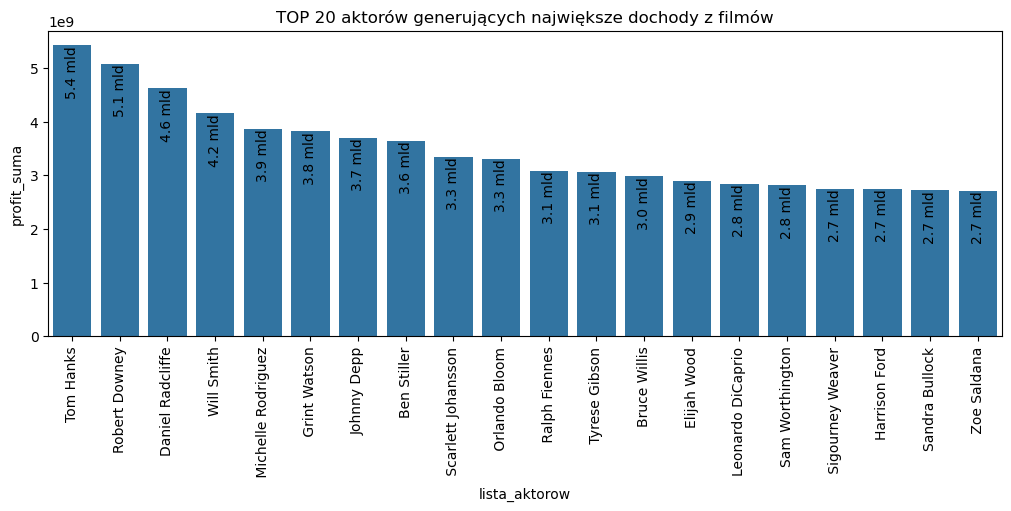

In [13]:
plt.close('all')

plt.figure(layout='constrained', figsize = (10, 5))
plt.title('TOP 20 aktorów generujących największe dochody z filmów')
rys6 = sns.barplot(x = 'lista_aktorow', y = 'profit_suma', data = top20_aktorzy_dochod)

for container in rys6.containers:
    for bar in container:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{bar.get_height()/1e9:.1f} mld',
            ha = 'center',
            va = 'top',
            rotation=90
        )

plt.xticks(rotation = 90)
plt.savefig('rys6. TOP 20 aktorów generujących największe dochody z filmów.pdf', format = 'pdf')
rys6.figure

In [14]:
df2 = df[['title', 'genres', 'vote_average', 'vote_count', 'profit_sum']]
df2 = df2.sort_values('profit_sum', ascending = False)
df2 = df2.reset_index()
df2 = df2.loc[:19, :]
df2

,index,title,genres,vote_average,vote_count,profit_sum
0,0,Avatar,Action Adventure Fantasy Science Fiction,7.2,11800,2550965087
1,25,Titanic,Drama Romance Thriller,7.5,7562,1645034188
2,28,Jurassic World,Action Adventure Science Fiction Thriller,6.5,8662,1363528810
3,44,Furious 7,Action,5.9,4176,1316249360
4,16,The Avengers,Science Fiction Action Adventure,7.4,11776,1299557910
5,7,Avengers: Age of Ultron,Action Adventure Science Fiction,7.3,6767,1125403694
6,124,Frozen,Animation Adventure Family,6.4,5295,1124219009
7,546,Minions,Family Animation Adventure Comedy,6.1,4571,1082730962
8,329,The Lord of the Rings: The Return of the King,Adventure Fantasy Action,6.2,8064,1024888979
9,31,Iron Man 3,Action Adventure Science Fiction,6.7,8806,1015439994


In [15]:
df3 = df
df3['gatunki'] = df3['genres'].str.split(" ")
df3_exploded = df3.explode('gatunki')
najczestsze_gatunki = df3_exploded.groupby('gatunki').agg(
    czestotliwosc_gatunkow = ('genres', 'count'),
    dochody = ('profit_sum', 'sum')
).sort_values('dochody', ascending = False)

najczestsze_gatunki = najczestsze_gatunki.reset_index()
najczestsze_gatunki = najczestsze_gatunki.loc[:10, :]
najczestsze_gatunki = najczestsze_gatunki.drop(7)
najczestsze_gatunki

,gatunki,czestotliwosc_gatunkow,dochody
0,Adventure,790,109042217696
1,Action,1153,100591994133
2,Comedy,1722,76767422300
3,Drama,2297,70106459400
4,Thriller,1259,60867245704
5,Family,510,55044337135
6,Fantasy,418,53043877992
8,Fiction,530,52284842139
9,Animation,234,35347959757
10,Romance,890,34044654258


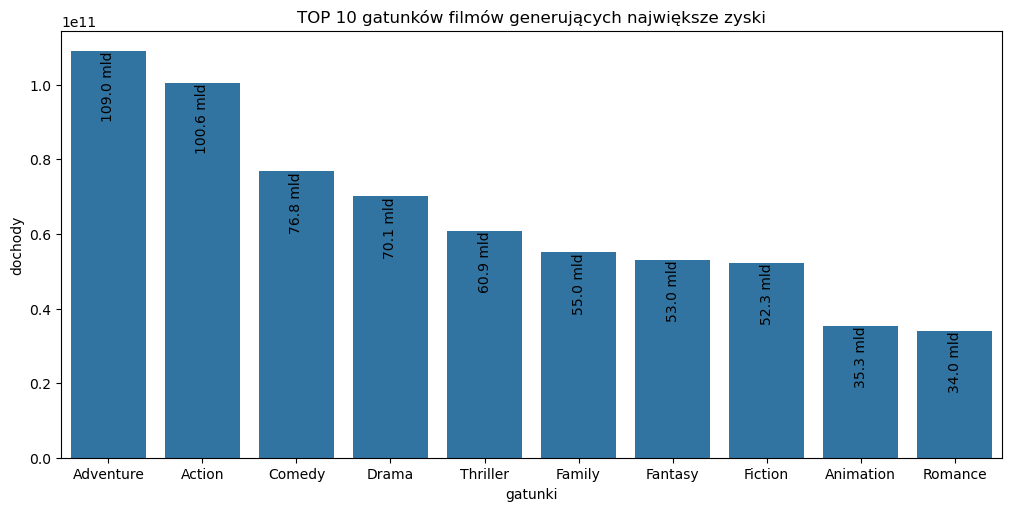

In [16]:
plt.close('all')

plt.figure(layout='constrained', figsize = (10, 5))
plt.title('TOP 10 gatunków filmów generujących największe zyski')
rys5 = sns.barplot(x = 'gatunki', y = 'dochody', data = najczestsze_gatunki)

for container in rys5.containers:
    for bar in container:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{bar.get_height()/1e9:.1f} mld',
            ha = 'center',
            va = 'top',
            rotation=90
        )

plt.savefig('rys5. TOP 10 gatunków filmów generujących największe zyski.pdf', format = 'pdf')
rys5.figure

In [17]:
df4 = df
df4_drama = df4[df4['genres'].str.contains('Drama', na = False, case = False)]
df4_drama = df4_drama.sort_values('profit_sum', ascending = False)
df4_drama = df4_drama[['title', 'genres', 'vote_average', 'vote_count', 'profit_sum']]
df4_drama = df4_drama.reset_index()
df4_drama = df4_drama.loc[:19 :]
df4_drama

,index,title,genres,vote_average,vote_count,profit_sum
0,25,Titanic,Drama Romance Thriller,7.5,7562,1645034188
1,3,The Dark Knight Rises,Action Crime Drama Thriller,7.6,9106,834939099
2,65,The Dark Knight,Drama Action Crime Thriller,6.4,12002,819558444
3,78,The Jungle Book,Family Adventure Drama Fantasy,8.0,2892,791550600
4,494,The Lion King,Family Animation Drama,7.3,5376,743241776
5,172,The Twilight Saga: Breaking Dawn - Part 2,Adventure Fantasy Drama Romance,6.9,2553,709000000
6,77,Inside Out,Drama Comedy Animation Family,5.6,6560,682611174
7,898,The Twilight Saga: New Moon,Adventure Fantasy Drama Romance,6.1,2436,659827462
8,1145,The Sixth Sense,Mystery Thriller Drama,6.3,3147,632806292
9,612,The Twilight Saga: Eclipse,Adventure Fantasy Drama Romance,5.7,2301,630491347


In [18]:
def filtruj_gatunki(df, gatunek):
    df_filtr = df[df['genres'].str.contains(gatunek, na = False, case = False)]
    df_filtr = df_filtr.sort_values('profit_sum', ascending = False)
    df_filtr = df_filtr[['title', 'genres', 'vote_average', 'vote_count', 'profit_sum']]
    df_filtr = df_filtr.reset_index()
    df_filtr = df_filtr.loc[:19 :]
    
    return df_filtr

df5 = df
df5_Drama = filtruj_gatunki(df5, 'Drama')
df5_Drama

,index,title,genres,vote_average,vote_count,profit_sum
0,25,Titanic,Drama Romance Thriller,7.5,7562,1645034188
1,3,The Dark Knight Rises,Action Crime Drama Thriller,7.6,9106,834939099
2,65,The Dark Knight,Drama Action Crime Thriller,6.4,12002,819558444
3,78,The Jungle Book,Family Adventure Drama Fantasy,8.0,2892,791550600
4,494,The Lion King,Family Animation Drama,7.3,5376,743241776
5,172,The Twilight Saga: Breaking Dawn - Part 2,Adventure Fantasy Drama Romance,6.9,2553,709000000
6,77,Inside Out,Drama Comedy Animation Family,5.6,6560,682611174
7,898,The Twilight Saga: New Moon,Adventure Fantasy Drama Romance,6.1,2436,659827462
8,1145,The Sixth Sense,Mystery Thriller Drama,6.3,3147,632806292
9,612,The Twilight Saga: Eclipse,Adventure Fantasy Drama Romance,5.7,2301,630491347


In [19]:
gatunki = najczestsze_gatunki['gatunki'].tolist()
#gatunki

for gatunek in gatunki:
    print(f'Filmy o największym dochodzie w kategorii {gatunek}')
    df_top = filtruj_gatunki(df5, gatunek)
    display(df_top)

Filmy o największym dochodzie w kategorii Adventure


,index,title,genres,vote_average,vote_count,profit_sum
0,0,Avatar,Action Adventure Fantasy Science Fiction,7.2,11800,2550965087
1,28,Jurassic World,Action Adventure Science Fiction Thriller,6.5,8662,1363528810
2,16,The Avengers,Science Fiction Action Adventure,7.4,11776,1299557910
3,7,Avengers: Age of Ultron,Action Adventure Science Fiction,7.3,6767,1125403694
4,124,Frozen,Animation Adventure Family,6.4,5295,1124219009
5,546,Minions,Family Animation Adventure Comedy,6.1,4571,1082730962
6,329,The Lord of the Rings: The Return of the King,Adventure Fantasy Action,6.2,8064,1024888979
7,31,Iron Man 3,Action Adventure Science Fiction,6.7,8806,1015439994
8,52,Transformers: Dark of the Moon,Action Science Fiction Adventure,6.7,3299,928746996
9,29,Skyfall,Action Adventure Thriller,0.0,7604,908561013


Filmy o największym dochodzie w kategorii Action


,index,title,genres,vote_average,vote_count,profit_sum
0,0,Avatar,Action Adventure Fantasy Science Fiction,7.2,11800,2550965087
1,28,Jurassic World,Action Adventure Science Fiction Thriller,6.5,8662,1363528810
2,44,Furious 7,Action,5.9,4176,1316249360
3,16,The Avengers,Science Fiction Action Adventure,7.4,11776,1299557910
4,7,Avengers: Age of Ultron,Action Adventure Science Fiction,7.3,6767,1125403694
5,329,The Lord of the Rings: The Return of the King,Adventure Fantasy Action,6.2,8064,1024888979
6,31,Iron Man 3,Action Adventure Science Fiction,6.7,8806,1015439994
7,52,Transformers: Dark of the Moon,Action Science Fiction Adventure,6.7,3299,928746996
8,29,Skyfall,Action Adventure Thriller,0.0,7604,908561013
9,26,Captain America: Civil War,Adventure Action Science Fiction,7.1,7241,903304495


Filmy o największym dochodzie w kategorii Comedy


,index,title,genres,vote_average,vote_count,profit_sum
0,546,Minions,Family Animation Adventure Comedy,6.1,4571,1082730962
1,506,Despicable Me 2,Animation Comedy Family,7.6,4637,894761885
2,42,Toy Story 3,Animation Family Comedy,5.1,4597,866969703
3,348,Ice Age: Dawn of the Dinosaurs,Animation Comedy Family Adventure,6.3,2271,796686817
4,325,Ice Age: Continental Drift,Animation Comedy Adventure Family,5.6,2672,782244782
5,565,Shrek 2,Adventure Animation Comedy Family Fantasy,4.5,2988,769838758
6,788,Deadpool,Action Adventure Comedy,5.4,10995,725112979
7,77,Inside Out,Drama Comedy Animation Family,5.6,6560,682611174
8,809,Forrest Gump,Comedy Drama Romance,6.0,7927,622945399
9,86,Shrek Forever After,Comedy Adventure Fantasy Animation Family,7.6,1959,587600867


Filmy o największym dochodzie w kategorii Drama


,index,title,genres,vote_average,vote_count,profit_sum
0,25,Titanic,Drama Romance Thriller,7.5,7562,1645034188
1,3,The Dark Knight Rises,Action Crime Drama Thriller,7.6,9106,834939099
2,65,The Dark Knight,Drama Action Crime Thriller,6.4,12002,819558444
3,78,The Jungle Book,Family Adventure Drama Fantasy,8.0,2892,791550600
4,494,The Lion King,Family Animation Drama,7.3,5376,743241776
5,172,The Twilight Saga: Breaking Dawn - Part 2,Adventure Fantasy Drama Romance,6.9,2553,709000000
6,77,Inside Out,Drama Comedy Animation Family,5.6,6560,682611174
7,898,The Twilight Saga: New Moon,Adventure Fantasy Drama Romance,6.1,2436,659827462
8,1145,The Sixth Sense,Mystery Thriller Drama,6.3,3147,632806292
9,612,The Twilight Saga: Eclipse,Adventure Fantasy Drama Romance,5.7,2301,630491347


Filmy o największym dochodzie w kategorii Thriller


,index,title,genres,vote_average,vote_count,profit_sum
0,25,Titanic,Drama Romance Thriller,7.5,7562,1645034188
1,28,Jurassic World,Action Adventure Science Fiction Thriller,6.5,8662,1363528810
2,29,Skyfall,Action Adventure Thriller,0.0,7604,908561013
3,3,The Dark Knight Rises,Action Crime Drama Thriller,7.6,9106,834939099
4,65,The Dark Knight,Drama Action Crime Thriller,6.4,12002,819558444
5,96,Inception,Action Thriller Science Fiction Mystery Adventure,8.1,13752,665532764
6,201,The Da Vinci Code,Thriller Mystery,6.6,2704,642820459
7,1145,The Sixth Sense,Mystery Thriller Drama,6.3,3147,632806292
8,200,The Hunger Games: Mockingjay - Part 1,Science Fiction Adventure Thriller,7.5,5584,627100229
9,239,Gravity,Science Fiction Thriller Drama,5.8,5751,611392705


Filmy o największym dochodzie w kategorii Family


,index,title,genres,vote_average,vote_count,profit_sum
0,124,Frozen,Animation Adventure Family,6.4,5295,1124219009
1,546,Minions,Family Animation Adventure Comedy,6.1,4571,1082730962
2,506,Despicable Me 2,Animation Comedy Family,7.6,4637,894761885
3,42,Toy Story 3,Animation Family Comedy,5.1,4597,866969703
4,197,Harry Potter and the Philosopher's Stone,Adventure Fantasy Family,6.7,7006,851475550
5,328,Finding Nemo,Animation Family,7.0,6122,846335536
6,32,Alice in Wonderland,Family Fantasy Adventure,6.8,4645,825491110
7,504,The Secret Life of Pets,Animation Family,4.1,3462,800958308
8,348,Ice Age: Dawn of the Dinosaurs,Animation Comedy Family Adventure,6.3,2271,796686817
9,78,The Jungle Book,Family Adventure Drama Fantasy,8.0,2892,791550600


Filmy o największym dochodzie w kategorii Fantasy


,index,title,genres,vote_average,vote_count,profit_sum
0,0,Avatar,Action Adventure Fantasy Science Fiction,7.2,11800,2550965087
1,329,The Lord of the Rings: The Return of the King,Adventure Fantasy Action,6.2,8064,1024888979
2,12,Pirates of the Caribbean: Dead Man's Chest,Adventure Fantasy Action,7.0,5246,865659812
3,197,Harry Potter and the Philosopher's Stone,Adventure Fantasy Family,6.7,7006,851475550
4,330,The Lord of the Rings: The Two Towers,Adventure Fantasy Action,6.7,7487,847287400
5,32,Alice in Wonderland,Family Fantasy Adventure,6.8,4645,825491110
6,78,The Jungle Book,Family Adventure Drama Fantasy,8.0,2892,791550600
7,113,Harry Potter and the Order of the Phoenix,Adventure Fantasy Family Mystery,5.6,5494,788212738
8,2967,E.T. the Extra-Terrestrial,Science Fiction Adventure Family Fantasy,5.7,3269,782410554
9,262,The Lord of the Rings: The Fellowship of the Ring,Adventure Fantasy Action,4.1,8705,778368364


Filmy o największym dochodzie w kategorii Fiction


,index,title,genres,vote_average,vote_count,profit_sum
0,0,Avatar,Action Adventure Fantasy Science Fiction,7.2,11800,2550965087
1,28,Jurassic World,Action Adventure Science Fiction Thriller,6.5,8662,1363528810
2,16,The Avengers,Science Fiction Action Adventure,7.4,11776,1299557910
3,7,Avengers: Age of Ultron,Action Adventure Science Fiction,7.3,6767,1125403694
4,31,Iron Man 3,Action Adventure Science Fiction,6.7,8806,1015439994
5,52,Transformers: Dark of the Moon,Action Science Fiction Adventure,6.7,3299,928746996
6,26,Captain America: Civil War,Adventure Action Science Fiction,7.1,7241,903304495
7,36,Transformers: Age of Extinction,Science Fiction Action Adventure,6.0,3095,881405097
8,675,Jurassic Park,Adventure Science Fiction,0.0,4856,857100000
9,233,Star Wars: Episode I - The Phantom Menace,Adventure Action Science Fiction,7.5,4432,809317558


Filmy o największym dochodzie w kategorii Animation


,index,title,genres,vote_average,vote_count,profit_sum
0,124,Frozen,Animation Adventure Family,6.4,5295,1124219009
1,546,Minions,Family Animation Adventure Comedy,6.1,4571,1082730962
2,506,Despicable Me 2,Animation Comedy Family,7.6,4637,894761885
3,42,Toy Story 3,Animation Family Comedy,5.1,4597,866969703
4,328,Finding Nemo,Animation Family,7.0,6122,846335536
5,504,The Secret Life of Pets,Animation Family,4.1,3462,800958308
6,348,Ice Age: Dawn of the Dinosaurs,Animation Comedy Family Adventure,6.3,2271,796686817
7,325,Ice Age: Continental Drift,Animation Comedy Adventure Family,5.6,2672,782244782
8,565,Shrek 2,Adventure Animation Comedy Family Fantasy,4.5,2988,769838758
9,494,The Lion King,Family Animation Drama,7.3,5376,743241776


Filmy o największym dochodzie w kategorii Romance


,index,title,genres,vote_average,vote_count,profit_sum
0,25,Titanic,Drama Romance Thriller,7.5,7562,1645034188
1,172,The Twilight Saga: Breaking Dawn - Part 2,Adventure Fantasy Drama Romance,6.9,2553,709000000
2,898,The Twilight Saga: New Moon,Adventure Fantasy Drama Romance,6.1,2436,659827462
3,612,The Twilight Saga: Eclipse,Adventure Fantasy Drama Romance,5.7,2301,630491347
4,809,Forrest Gump,Comedy Drama Romance,6.0,7927,622945399
5,81,Maleficent,Fantasy Adventure Action Family Romance,5.8,4496,578539785
6,886,Mamma Mia!,Comedy Romance,5.9,1386,557841637
7,1154,Fifty Shades of Grey,Drama Romance Thriller,6.9,3254,531006128
8,2017,Ghost,Fantasy Drama Thriller Mystery Romance,5.9,1339,483000000
9,2668,Pretty Woman,Romance Comedy,7.2,1746,449000000


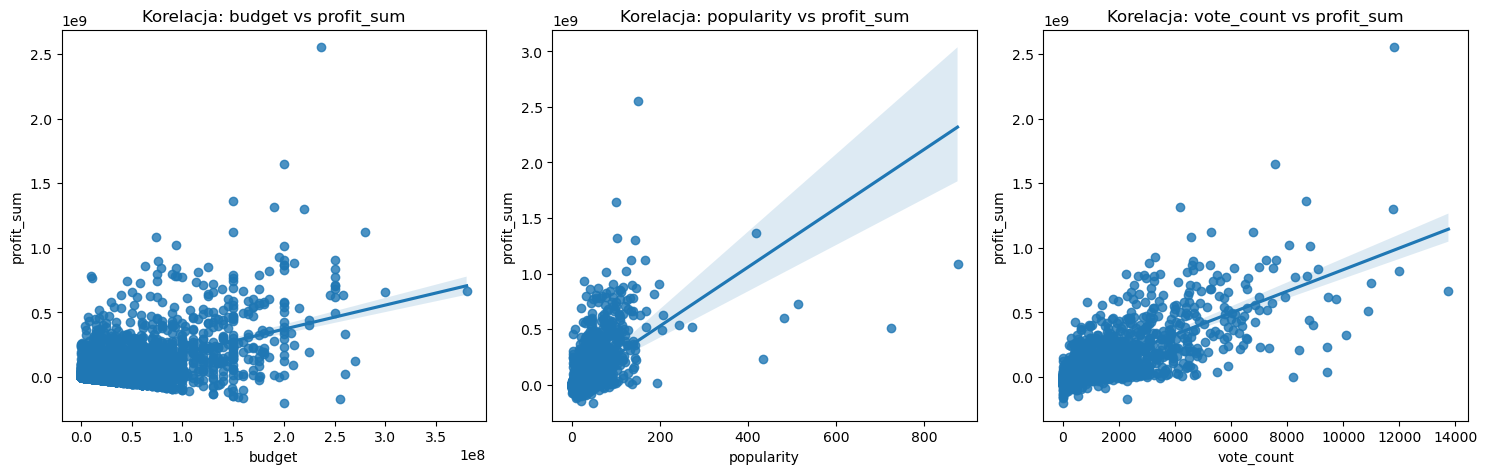

In [20]:
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

dane_niezalezne = ['budget', 'popularity', 'vote_count']
dana_zalezna = ('profit_sum')
plt.close('all')

(figura, wykres) = plt.subplots(1, len(dane_niezalezne), figsize=(5 * len(dane_niezalezne), 5))

for os, dana_n in zip(wykres, dane_niezalezne):
    sns.regplot(x=dana_n, y=dana_zalezna, data=df, ax=os)
    os.set_title(f'Korelacja: {dana_n} vs {dana_zalezna}')

plt.tight_layout()
plt.savefig('rys4. Korelacja - budżetu, popularności, liczby głosów z dochodem.pdf', format = 'pdf')
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score   

# Korelacje
odmiana = ['budżetem', 'popularnością', 'liczbą ocen']
for slowo, dana_n in zip (odmiana, dane_niezalezne):
    df_kor = df[[dana_n, dana_zalezna]].dropna()
    korelacja = df_kor[dana_n].corr(df_kor[dana_zalezna])
    print(f'Współczynnik korelacji między {slowo} i dochodem wynosi: {korelacja}')
    print('')
    
# Regresja wielowymiarowa
df_reg = df[['budget', 'popularity', 'vote_count', 'profit_sum']].dropna()

model = LinearRegression()
x = df_reg[['budget', 'popularity', 'vote_count']]
y = df_reg['profit_sum']
model.fit(x, y)
y_pred = model.predict(x)
r2 = r2_score(y, y_pred)

print(f'Współczynnik wielowymiarowej regresji liniowej dla całego modelu wynosi: R2 = {r2}')

Współczynnik korelacji między budżetem i dochodem wynosi: 0.559900785173437

Współczynnik korelacji między popularnością i dochodem wynosi: 0.6203827032692386

Współczynnik korelacji między liczbą ocen i dochodem wynosi: 0.7591854765550187

Współczynnik wielowymiarowej regresji liniowej dla całego modelu wynosi: R2 = 0.6000563904030516
